In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno
import statistics 
import category_encoders as ce
import sklearn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(os.getcwd())

C:\Users\tekbk\Artificial Intelligence cw


In [3]:
filePath = os.path.join(os.getcwd(), 'predictive_maintenance.csv')

In [4]:
df=pd.read_csv(filePath)


In [5]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
df = df.drop(["UDI","Product ID"],axis=1)

In [7]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [9]:
# label_encoder = preprocessing.LabelEncoder()
# df['Target'] = label_encoder.fit_transform(df['Failure Type'])
# # target 0 = Heat Dissipation failure
# # target 1 = No failure
# # target 2 = Overstrain failure
# # target 3 = Power failure
# # target 4 = Random failure

In [10]:
df["Target"].unique()

array([0, 1], dtype=int64)

In [11]:
# Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [12]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
6175,L,28.75,38.65,1517,44.3,4,0,No Failure,9.9
1658,H,25.95,35.85,1570,35.3,159,0,No Failure,9.9
4710,L,31.25,39.55,1673,32.2,166,0,No Failure,8.3
2720,L,27.45,37.05,1559,39.1,110,0,No Failure,9.6
4765,L,31.55,39.85,1892,22.5,79,0,No Failure,8.3


In [13]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [15]:
df.describe()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


<b> Explorfactory Data Analysis </b>

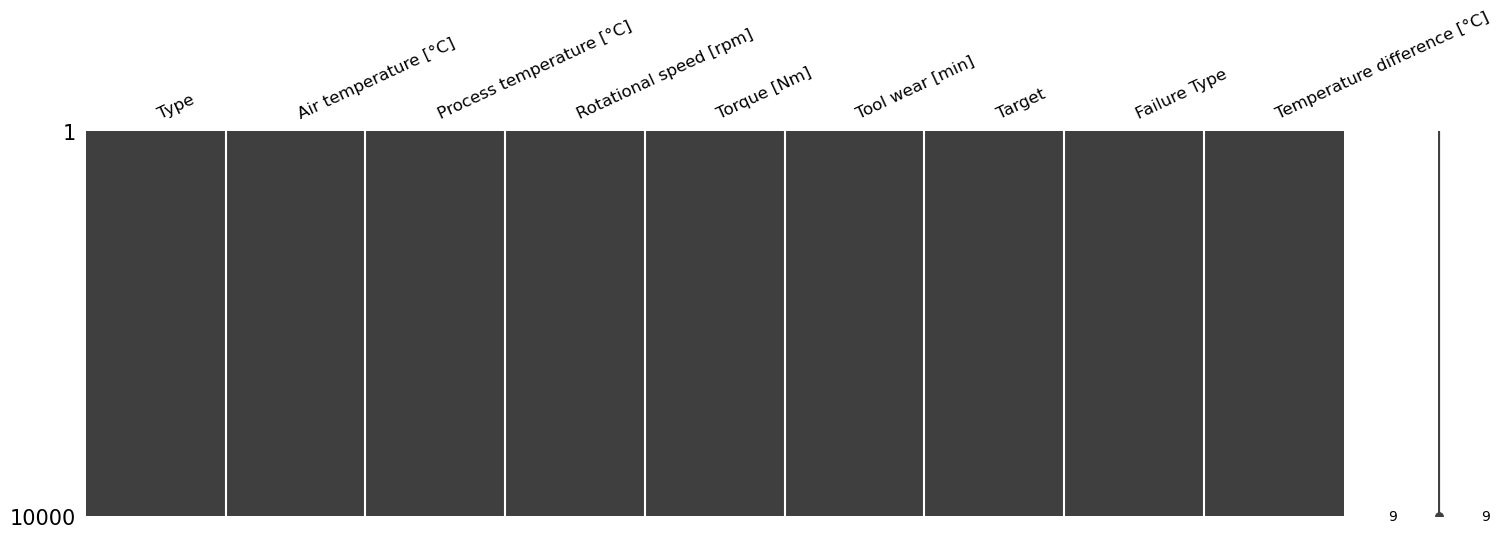

In [16]:
# Creating a matrix visualization of missing values
msno.matrix(df, figsize=(18,5), fontsize=12);
plt.xticks(rotation=25);

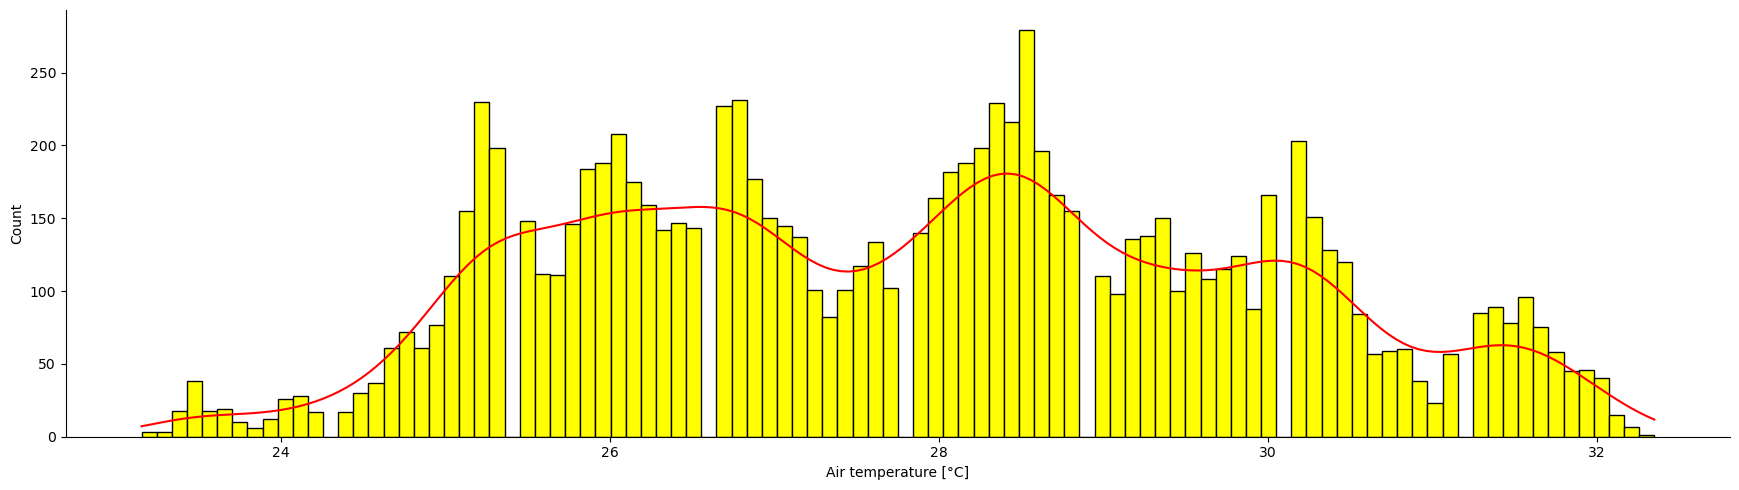

In [17]:
#creating a histogram with kernel density estimate (KDE) plot for the column "Air temperature"
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

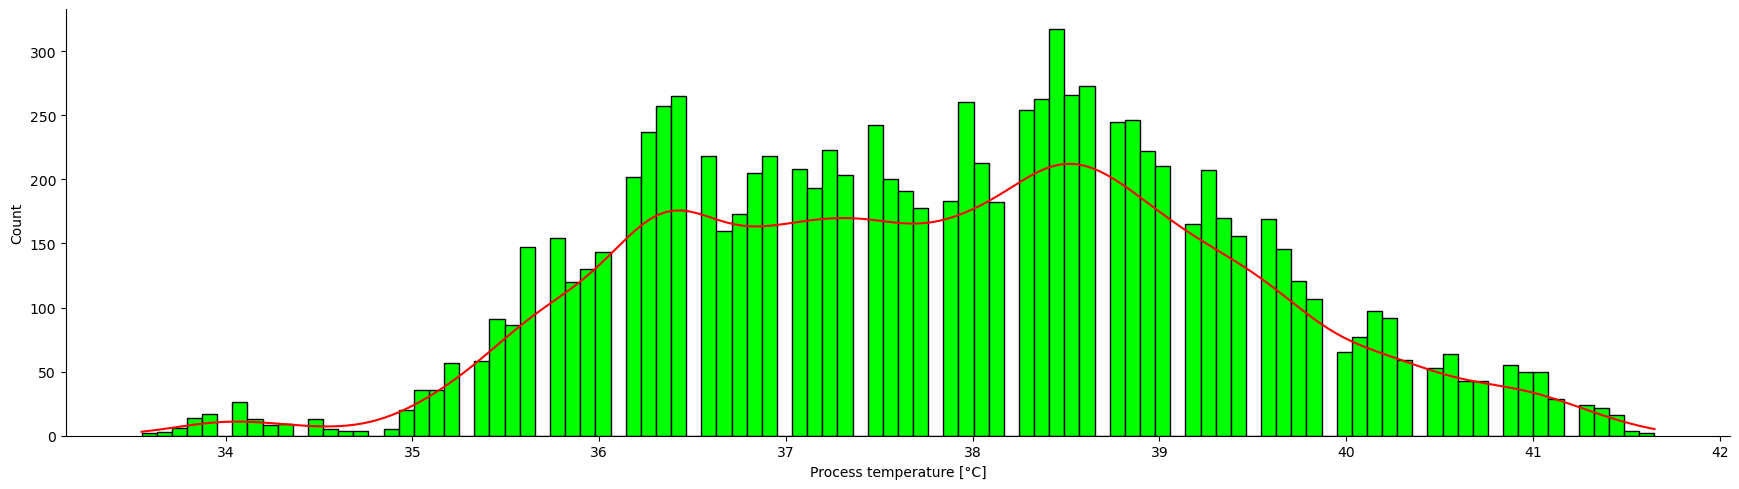

In [18]:
# creating a histogram with KDE plot for the "Process Temperature" Column
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

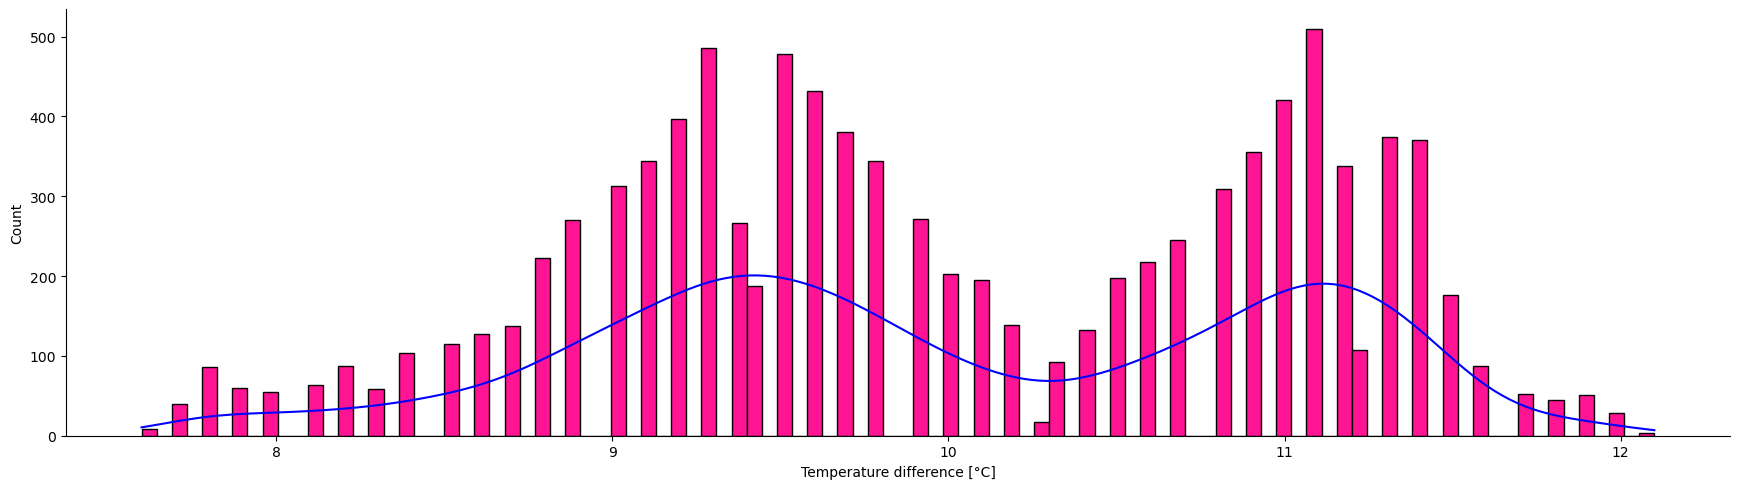

In [19]:
#creating a histogram with KDE plot for the column "Temperature "
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [20]:
for col in df[['Type','Target','Failure Type']]:
     # Printing the value counts for each unique value in the current column
    print(df[col].value_counts()) 
    #seperator
    print("****"*8)


L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


Text(0.5, 1.0, 'Type')

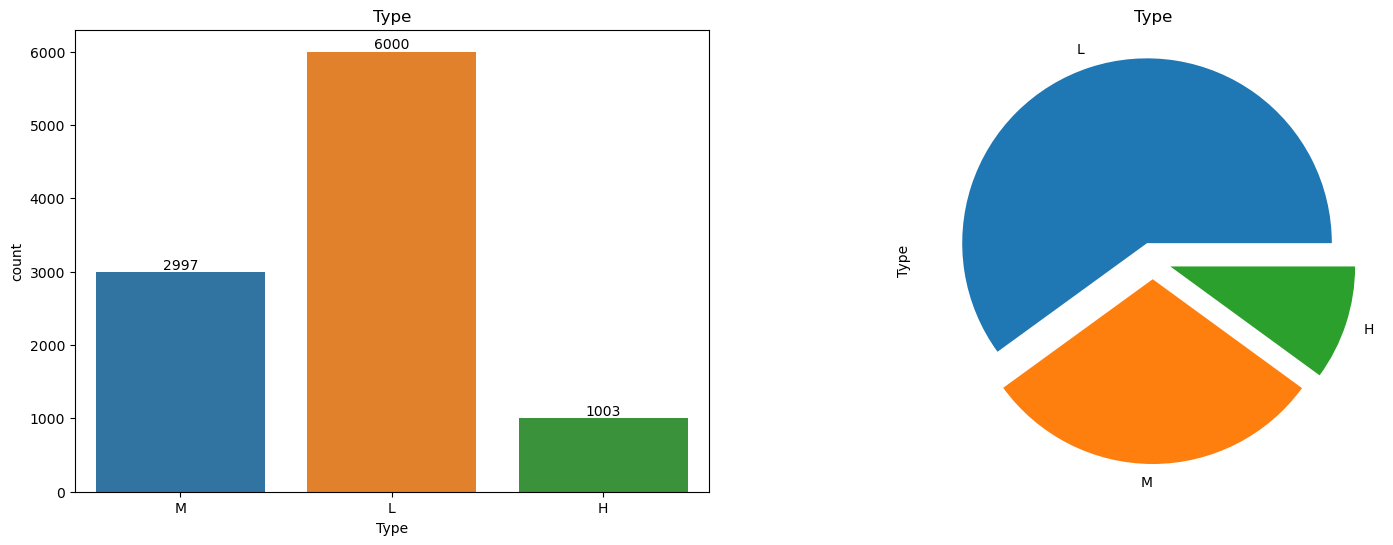

In [21]:
#creating a side-by-side countplot and a pie chart for the 'Type' column 
    
ax = plt.figure(figsize=(18,6))

# Creating the first subplot (countplot)
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type")

# Creating the second subplot (pie chart)
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1])
ax.set_title(label = "Type")

Text(0.5, 1.0, 'Target')

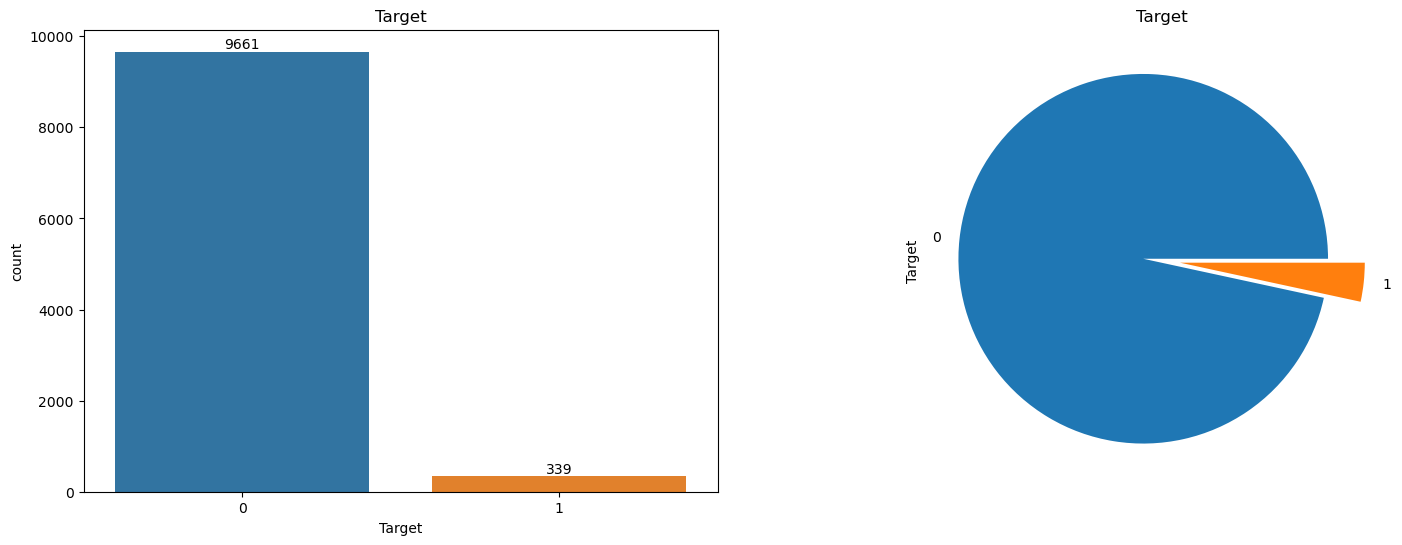

In [22]:
#creating a side-by-side countplot and a pie chart for the 'Target' column
ax = plt.figure(figsize=(18,6))

# Creating the first subplot (countplot)
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target")

# Creating the second subplot (pie chart)
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1])
ax.set_title(label = "Target")


In [23]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


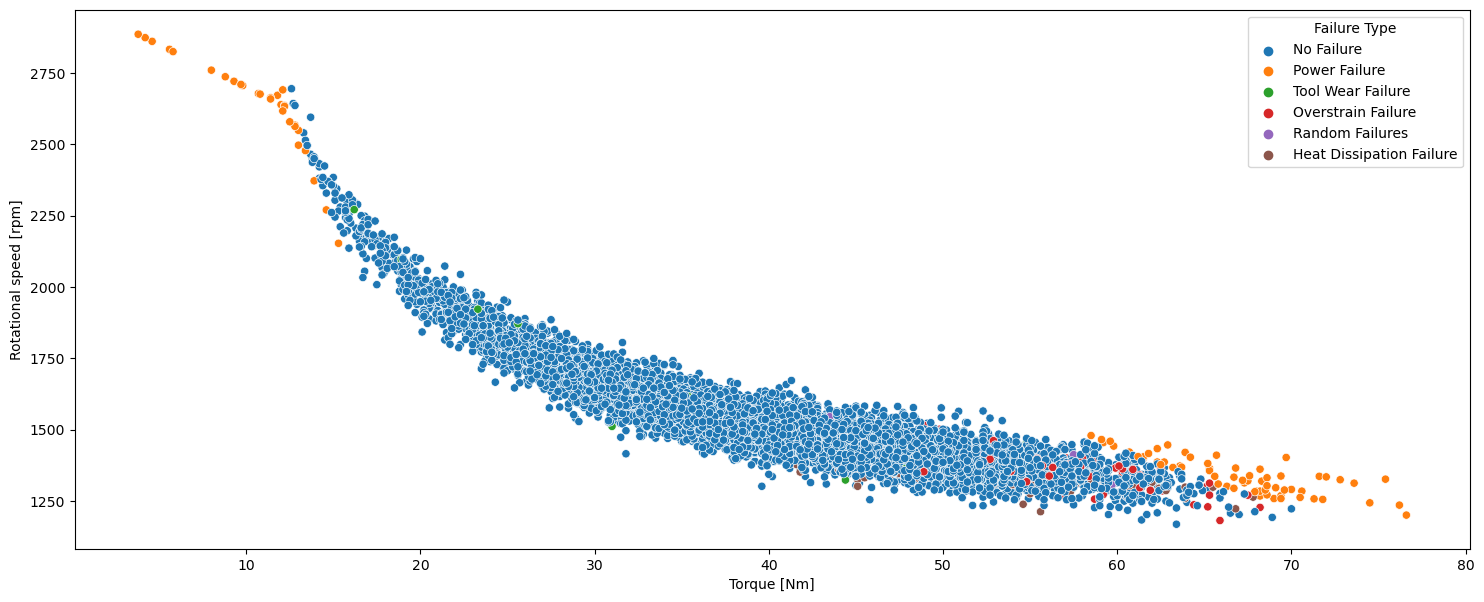

In [24]:
#creating a scatter plot for two numerical columns ("Torque [Nm]" and "Rotational speed [rpm]")
plt.figure(figsize=(18,7))
# Creating a scatter plot
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

In [25]:
#plt.figure(figsize = (15, 6))
#plt.grid()
#sns.swarmplot(df["Torque [Nm]"], df["Failure Type"], hue = df["Failure Type"]);

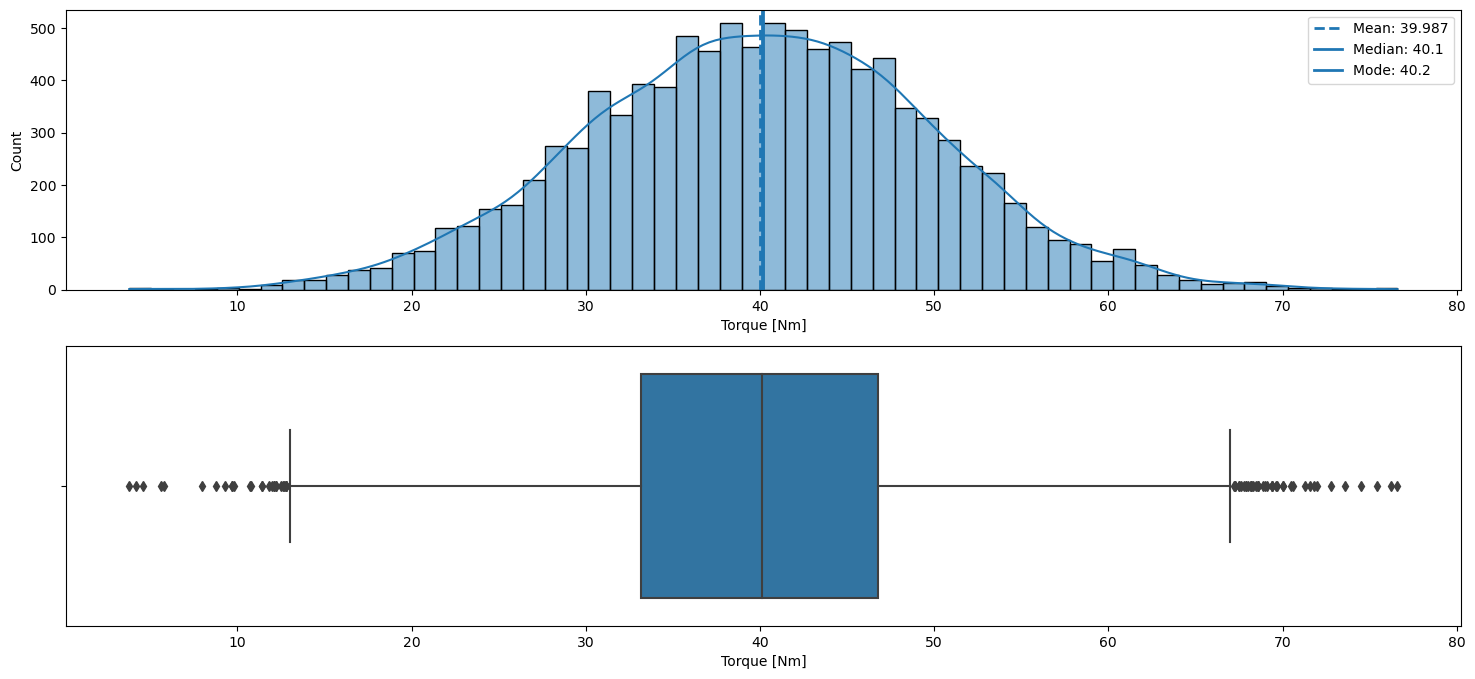

In [26]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    # Plot a histogram with KDE on the first axis
    sns.histplot(data=df[feature], kde=True, ax=ax[0])
    
     # Add vertical lines for mean, median, and mode on the histogram plot
    ax[0].axvline(x=df[feature].mean(), linestyle='--', linewidth=2, label='Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x=df[feature].median(), linewidth=2, label='Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x=statistics.mode(df[feature]), linewidth=2, label='Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    # Plot a boxplot on the second axis
    sns.boxplot(x=df[feature], ax=ax[1])
    
    plt.show()

plot_hist('Torque [Nm]')

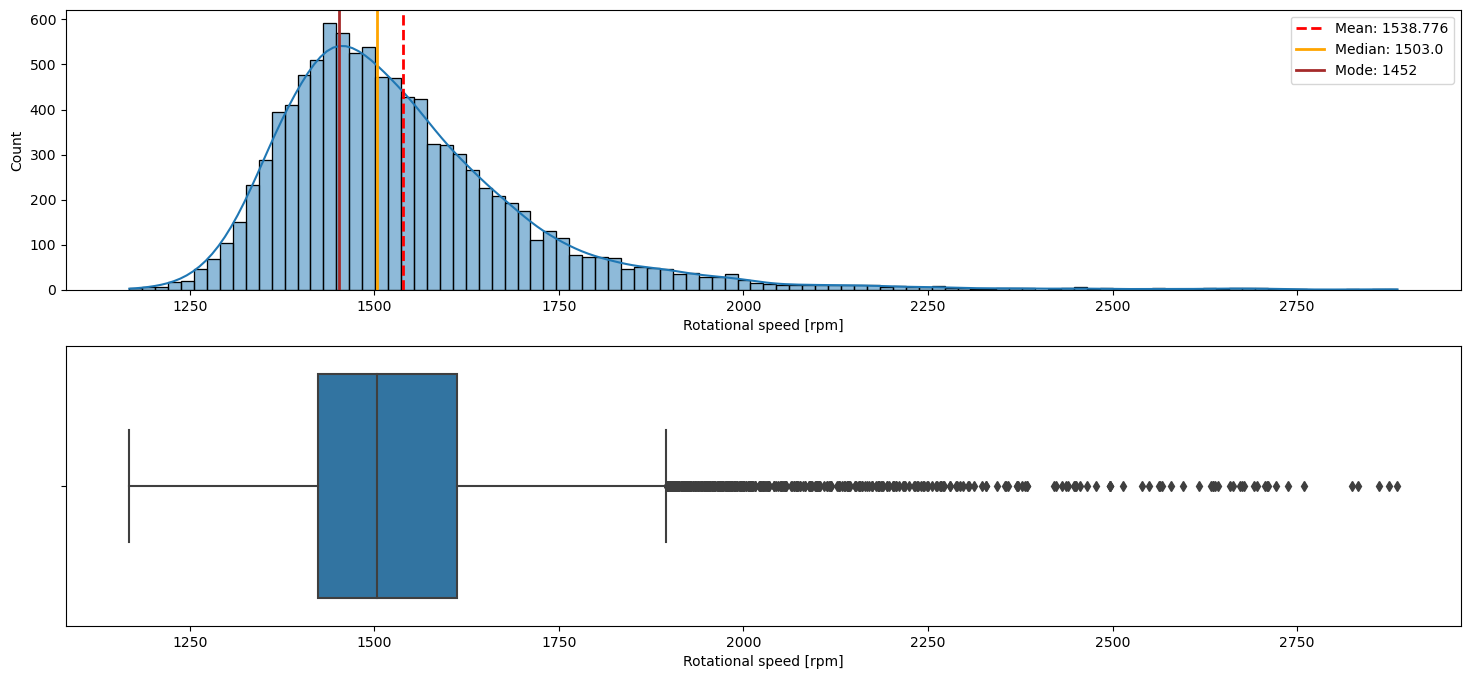

In [27]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    # Plot a histogram with KDE on the first axis
    sns.histplot(data=df[feature], kde=True, ax=ax[0])

    # Add vertical lines for mean, median, and mode on the histogram plot
    ax[0].axvline(x=df[feature].mean(), linestyle='--', linewidth=2, label='Mean: {}'.format(round(df[feature].mean(), 3)), color='red')
    ax[0].axvline(x=df[feature].median(), linewidth=2, label='Median: {}'.format(round(df[feature].median(), 3)), color='orange')
    ax[0].axvline(x=statistics.mode(df[feature]), linewidth=2, label='Mode: {}'.format(statistics.mode(df[feature])), color='brown')
    ax[0].legend()
    
    # Plot a boxplot on the second axis
    sns.boxplot(x=df[feature], ax=ax[1])
    
    # display plots
    plt.show()

# Example usage
plot_hist('Rotational speed [rpm]')

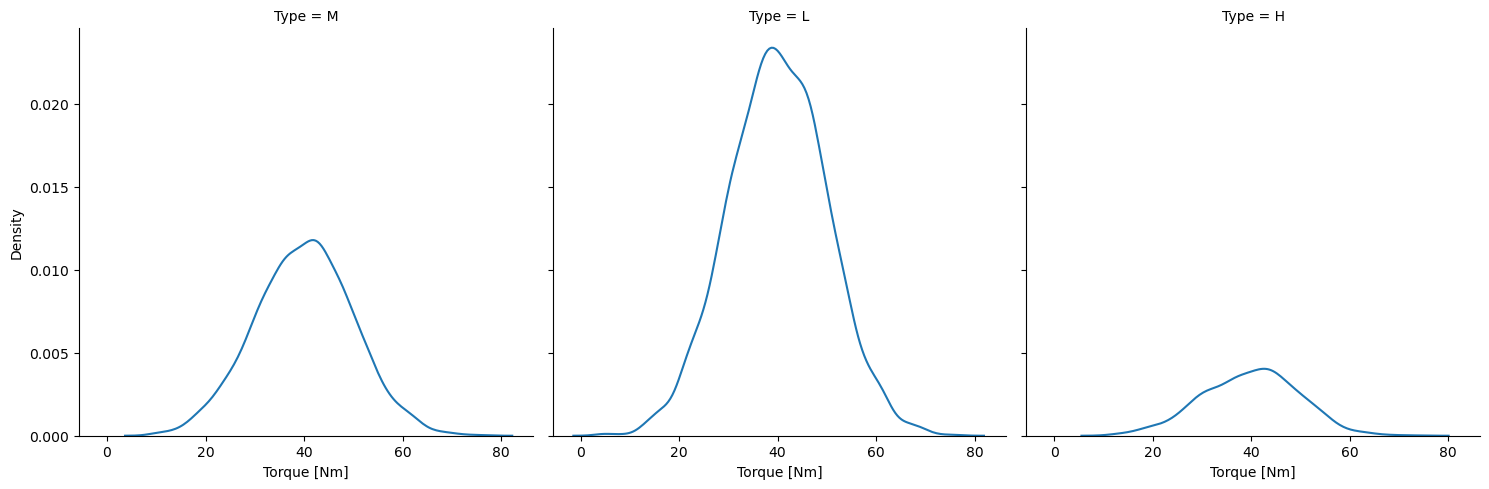

In [28]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

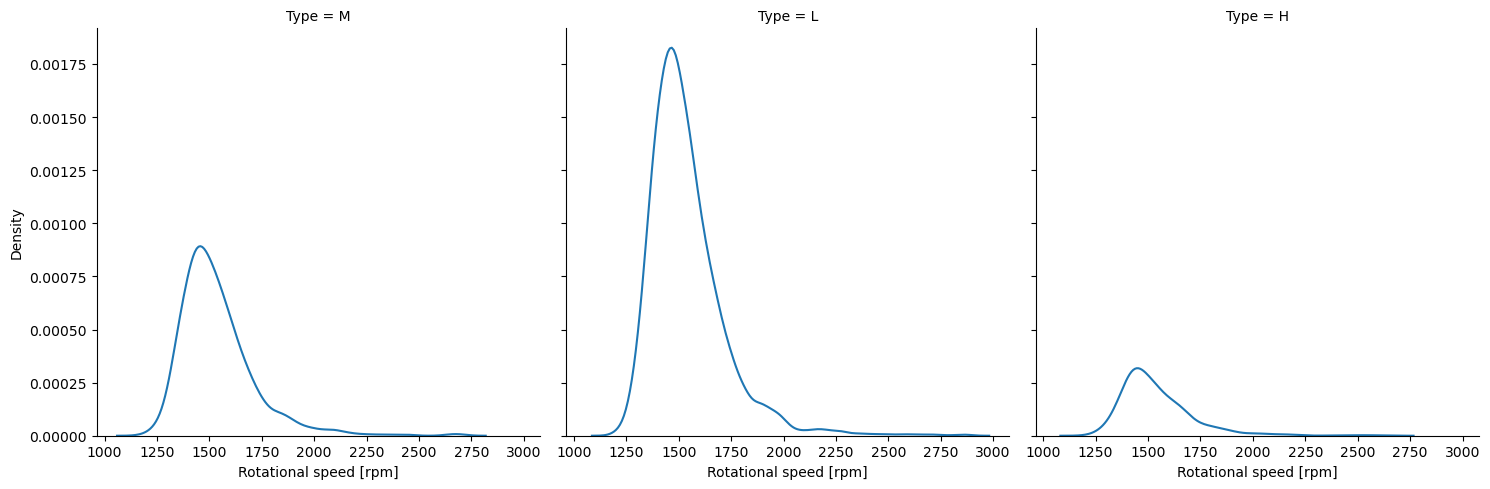

In [29]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

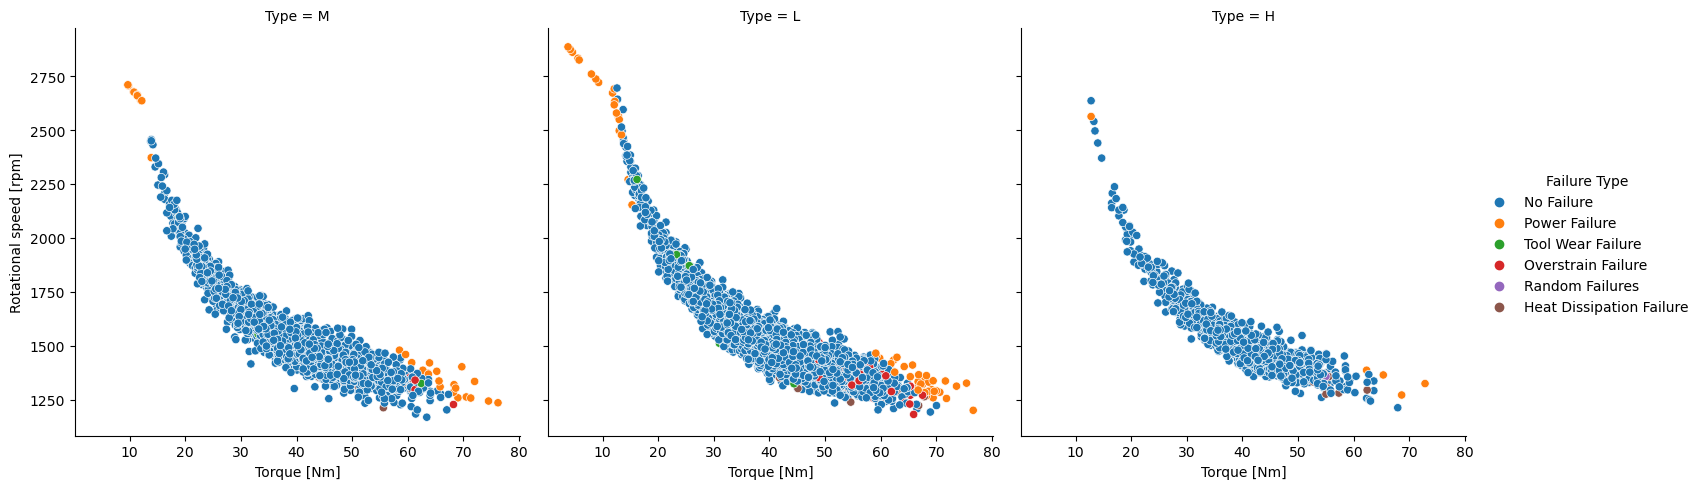

In [30]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');


<b> Feature Selection </b>

In [31]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [32]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [33]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [34]:
X

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,10.5
1,2,26.05,36.55,1408,46.3,3,0,10.5
2,2,25.95,36.35,1498,49.4,5,0,10.4
3,2,26.05,36.45,1433,39.5,7,0,10.4
4,2,26.05,36.55,1408,40.0,9,0,10.5
...,...,...,...,...,...,...,...,...
9995,1,26.65,36.25,1604,29.5,14,0,9.6
9996,3,26.75,36.25,1632,31.8,17,0,9.5
9997,1,26.85,36.45,1645,33.4,22,0,9.6
9998,3,26.85,36.55,1408,48.5,25,0,9.7


In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Failure Type, Length: 10000, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

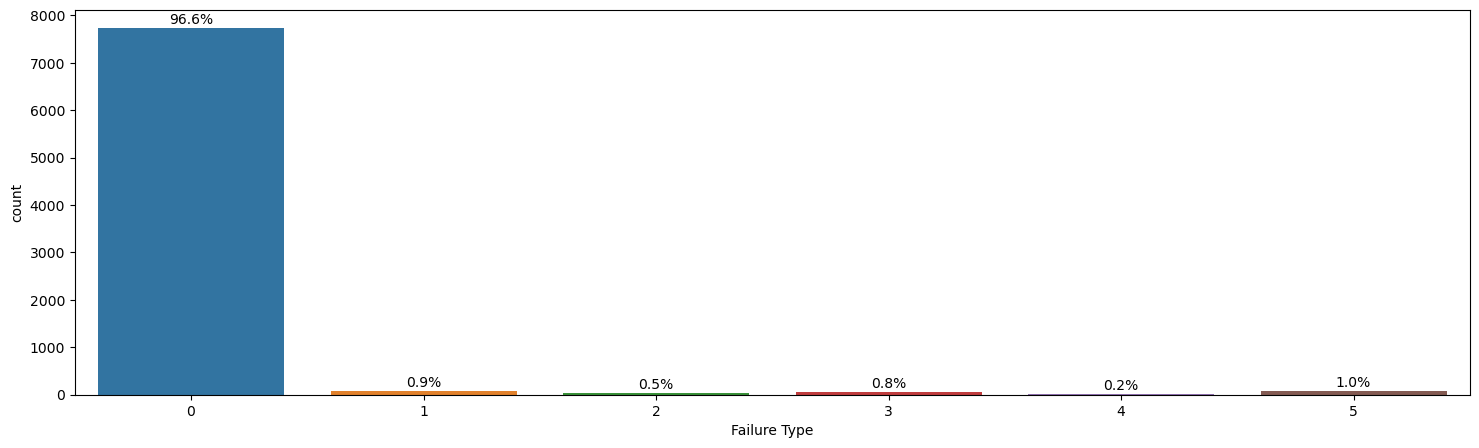

In [37]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

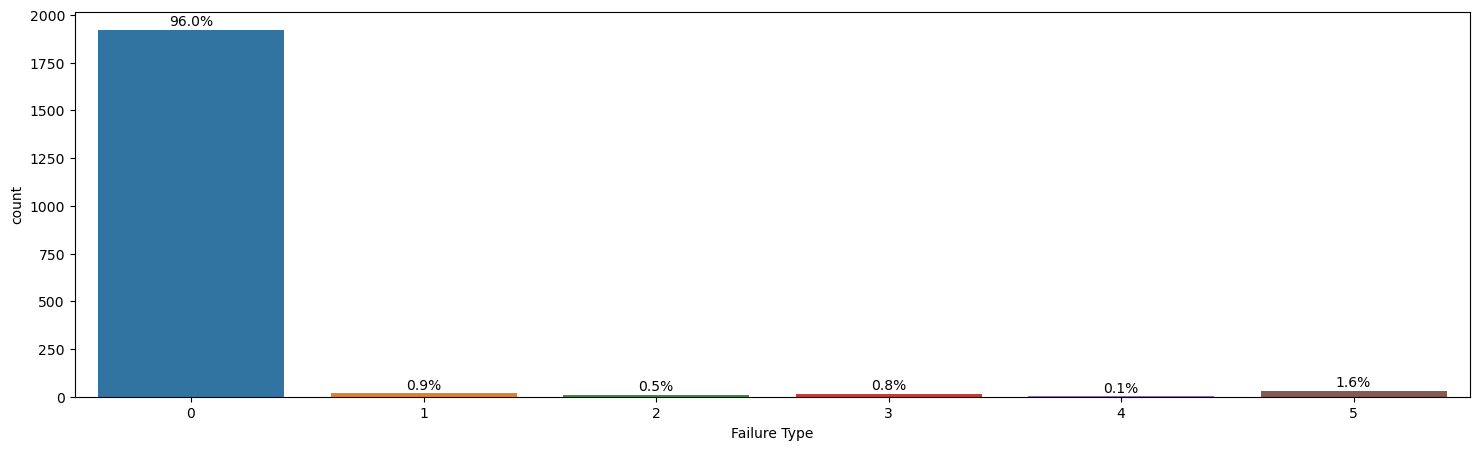

In [38]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

<b> Logistic Regression </b>

In [39]:
from sklearn.metrics import accuracy_score,classification_report

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)



print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
#ConfusionMatrixDisplay(confusion_matrix=cm);
#plt.title('Confusion Matrix');

Training Accuracy    : 96.74 %
Model Accuracy Score : 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.67      0.38      0.48        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


<b> Random Forest </b>

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.86      0.95      0.90        19
           2       1.00      0.89      0.94         9
           3       0.94      0.94      0.94        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.99      1.00      1.00      2000

--------------------------------------------------------


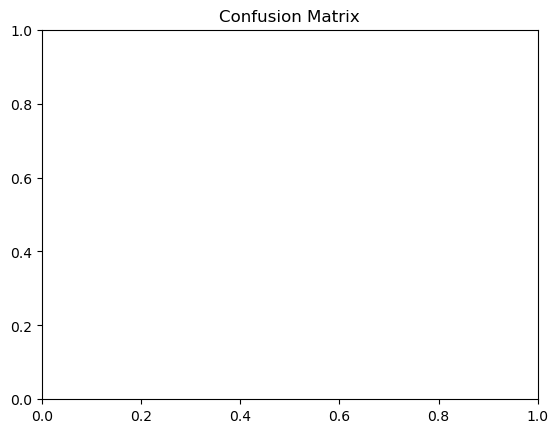

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plt.title('Confusion Matrix');

<b> SVM </b>

In [41]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


<h3> Model Building</h3>

In [42]:

training_accuracies = [100.00, 100.00, 96.74, 96.64]
model_accuracies = [99.55, 99.25, 96.25, 96.0]

# Creating a DataFrame with model information
models = pd.DataFrame({
    'Model': [
        'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Logistic Regression'
    ],
    
    'Training Accuracy': training_accuracies,
    'Model Accuracy Score': model_accuracies
})

# Display the models DataFrame
print(models)

                     Model  Training Accuracy  Model Accuracy Score
0            Decision Tree             100.00                 99.55
1            Random Forest             100.00                 99.25
2  Support Vector Machines              96.74                 96.25
3      Logistic Regression              96.64                 96.00


Results 

In [43]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[0 0 0 ... 0 0 0]


In [44]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
4486,0,0
1443,0,0
306,0,0
5316,0,0
5421,0,0


<h3>Tuning the hyperparameters for three classifiers</h3>

<b> Random Forest </b>

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Use the features and target variable based on your dataset
X = df.drop(columns=['Failure Type'], axis=1)
y = df['Failure Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, verbose=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

# Print additional metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9953749999999999
Test Accuracy: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.85      0.92        20
           2       1.00      0.82      0.90        11
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         6
           5       0.83      1.00      0.91        15

    accuracy                           0.99      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.99      0.99      0.99      2000



<b> SVM </b>

In [58]:

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Use the features and target variable based on your dataset
X = df[['Air temperature [°C]', 'Process temperature [°C]',
        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'Temperature difference [°C]']]  # Features

y = df['Target']  # Target variable

# Specify the hyperparameter grid
C_values = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


hyperparameters = {'C': C_values}

# Define the scoring metrics
scoring = {'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

# Create the GridSearchCV object with scoring
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=hyperparameters, scoring=scoring, refit='f1_score', verbose=True)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (f1_score):", grid_search.best_score_)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
result_columns = ['param_C', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']
print(results_df[result_columns])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.9}
Best Score (f1_score): 0.9496876660548285
   param_C  mean_test_precision  mean_test_recall  mean_test_f1_score
0     0.05             0.933349            0.9661            0.949442
1      0.1             0.933349            0.9661            0.949442
2      0.2             0.933349            0.9661            0.949442
3      0.3             0.933349            0.9661            0.949442
4     0.25             0.933349            0.9661            0.949442
5      0.4             0.933349            0.9661            0.949442
6      0.5             0.933349            0.9661            0.949442
7      0.6             0.933349            0.9661            0.949442
8      0.7             0.933349            0.9661            0.949442
9      0.8             0.933349            0.9661            0.949442
10     0.9             0.940243            0.9662            0.949688
11       1             0.9402

<b>Logistic regression </b> 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import pandas as pd

# Define the scoring metrics
scoring = {'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

# Specify the hyperparameter grid
C_values = [0.001, 0.01, 0.1, 1, 10,0.4, 0.5, 0.6, 0.9, 100]
penalty_values = ['l2']

hyperparameters = {'C': C_values, 'penalty': penalty_values}

# Create the GridSearchCV object with scoring
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=hyperparameters, scoring=scoring, refit='f1_score', verbose=True)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (f1_score):", grid_search.best_score_)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
result_columns = ['param_C', 'param_penalty', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']
print(results_df[result_columns])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Score (f1_score): 0.9581361285556074
  param_C param_penalty  mean_test_precision  mean_test_recall  \
0   0.001            l2             0.966678            0.9689   
1    0.01            l2             0.963506            0.9673   
2     0.1            l2             0.962156            0.9670   
3       1            l2             0.963047            0.9668   
4      10            l2             0.962223            0.9667   
5     0.4            l2             0.961071            0.9652   
6     0.5            l2             0.962467            0.9657   
7     0.6            l2             0.961720            0.9657   
8     0.9            l2             0.962301            0.9668   
9     100            l2             0.962223            0.9667   

   mean_test_f1_score  
0            0.957170  
1            0.958136  
2            0.956745  
3            0.956758  
4   